'''Titanic challenge'''

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
 #Importing dataset
titanic=pd.read_csv('D:\\R-Projects\\train.csv')
print()

In [3]:
df=titanic.copy()

In [4]:
#Lets check our columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Lets list our columns starting with the target column
columns= ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [6]:
#what's the datatype of our columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#Are there null values in our dataset? Let's see by writing a function to check through the set
def isnull():
    names=[]
    values=[]
    for column in columns:
        null_values_count=df[column].isnull().sum()
        names.append(column)
        values.append(null_values_count)
        data={'Column':names, 'Null values':values}
        data=pd.DataFrame(data=data)
        return data

In [8]:
d = isnull()
d

,Column,Null values
0,Survived,0


In [9]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In the abbove describe, we discover that the dset contains a total of 891 rows.

In [10]:
#Lets plot the distribution of each of our variables.
#We define a function first then we will be calling it

def distribution(column, bins=20, figsize=(8,8)):
    try:
        df[column].hist(bins=bins, figsize=figsize)
    except KeyError:
        print(f'The column {column} is not part of the dataframe')
        sns.set(style='darkgrid')

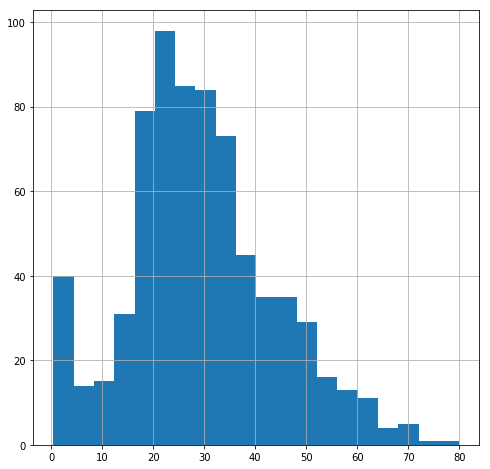

In [11]:
distribution('Age')

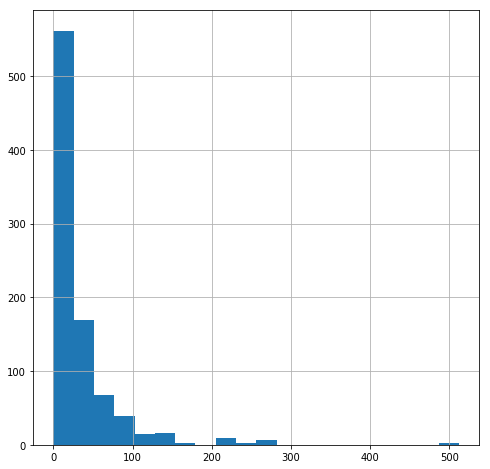

In [12]:
distribution('Fare')

We can only view the distribution of numerical values

In [13]:
#We have our numerical variables as 
numerical_attributes=['Age','Fare']
Categorical_attributes=['Pclass','Sex','SibSp','Parch','Embarked']
#You notice we have ingored the variables (i.e Cabin and Ticket) with string values which need encoding

In [14]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

We discover that Column 'Sex' has 577 males and 314 females

In [15]:
#How many males in the first class
males=df[df['Sex']=='male']
males_first_class=males[males['Pclass']==1]
len(males_first_class)

122

In [16]:
males_survived_first_class=males[males['Survived']==1]
len(males_survived_first_class)

109

We can see that there survived 109 men in the first class

In [17]:
#How many passengers died and had siblings
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [18]:
#We want to check unique values in Embarked column
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

From the overcell we cab derive that 644 passengers boarded at S, 168 at C, and 77 at Q. 

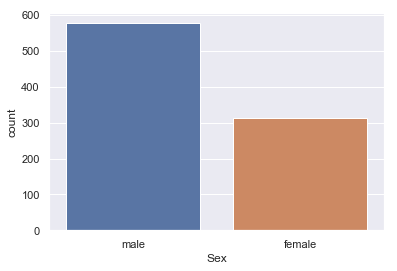

In [19]:
#can we plot the number of males and females in the ship? yes
sns.set(style='darkgrid')
sns.countplot (df['Sex'])

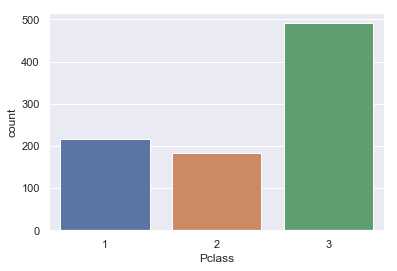

In [20]:
sns.countplot(df['Pclass'])

We can discover that 2nd class had few passegers followed by 1 and many in 3rd Class. 

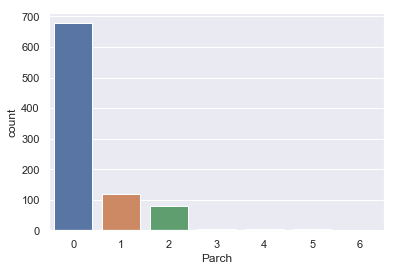

In [21]:
#How many people had children and died?
sns.countplot(df['Parch'])

We can discover that many people (687) without children died

In [2]:
#Let's fill any 0 vakue with nan
from numpy import nan
from numpy import isnan
from sklearn.impute import SimpleImputer
# mark zero values as missing or NaN
new_fao[['loan_amount_term']] = new_fao[['loan_amount_term']].replace(0, nan)
# retrieve the numpy array
values = new_fao.values
# define the imputer
imputer = SimpleImputer(missing_values=nan, strategy='mean')
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print('Missing: %d' % isnan(transformed_values).sum())

NameError: name 'new_fao' is not defined

Now let's start our models..

In [22]:
#importing all requiered libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

In [25]:
#Now we want to list the names of the models we are going to use in our project
names=['Gaussian NB', 'Logistic Regression', 'Kneighbors Classifier', 'Neural Net',
        'Decision Tree', 'Linear SVM', 'AdaBoost', 'Gradient Boosting', 
         'Random Forest']
#This code now lists the models themselves
models=[GaussianNB(), LogisticRegression(), KNeighborsClassifier(), MLPClassifier(),
         DecisionTreeClassifier(), LinearSVC(), AdaBoostClassifier(), 
          GradientBoostingClassifier(), RandomForestClassifier()]

In [26]:
#The are list of all columns in the dset
all_coulmns =['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
              'Fare', 'Cabin', 'Embarked']
#usable columns are here
columns=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
#Some columns in our dset contains categorical values and they are here
categorical_columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
#Lets think of encoding the two usable columns 
encoded_columns=['Sex','Embarked']
#We have some columns with continous variables
continous_columns=['Age','Fare']

In [27]:
#Lets view the structure of our dset
df=df[columns]
df.tail(12)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
879,1,1,female,56.0,0,1,83.1583,C
880,1,2,female,25.0,0,1,26.0000,S
881,0,3,male,33.0,0,0,7.8958,S
882,0,3,female,22.0,0,0,10.5167,S
883,0,2,male,28.0,0,0,10.5000,S
884,0,3,male,25.0,0,0,7.0500,S
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S


In [37]:
'''Now we want to make a single function to perfom the entire
process of preprocessing'''
'''The process will..
1. fill in the missing values
2. Scale the values
3. Encode categorical values'''

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self,columns):
        self.columns=columns
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        wanted_columns=X[self.columns]
        return wanted_columns
'''
num_pipeline=Pipeline([
         ('Column selector', ColumnSelector(continuos_columns)),
            ('imputer', Imputer(strategy='mean')),
            ('standard scaler', StandardScaler())
        ])
        tranformed_numerical_attributes=num_pipeline.fit_transform(df
'''
        
            

"\nnum_pipeline=Pipeline([\n         ('Column selector', ColumnSelector(continuos_columns)),\n            ('imputer', Imputer(strategy='mean')),\n            ('standard scaler', StandardScaler())\n        ])\n        tranformed_numerical_attributes=num_pipeline.fit_transform(df\n"

In [38]:
#Now we want to develop another function to encod all our string columns in the dset
encoded_sex=LabelEncoder().fit_transform(df['Sex'])
encoded_pclass=LabelEncoder().fit_transform(df['Pclass'])
embarked=df['Embarked']
embarked_transformed=[]
for value in embarked:
    value=str(value)
    embarked_transformed.append(value)
encoded_embarked=LabelEncoder().fit_transform(embarked_transformed)

In [39]:
#Now let's generate a clean dset with this single function
def clean(df):
    columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
               'Embarked']
    categorical_columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
    encoded_columns = ['Sex', 'Embarked']
    continuous_columns = ['Age', 'Fare']
    num_pipeline = Pipeline([
    ('Column selector', ColumnSelector(continuous_columns)),
    ('imputer', Imputer(strategy='median')),
    ('standard scaler', StandardScaler())
    ])
    transformed_numerical_attributes = num_pipeline.fit_transform(df)
    encoded_sex = LabelEncoder().fit_transform(df['Sex'])
    encoded_pclass = LabelEncoder().fit_transform(df['Pclass'])
    embarked = df['Embarked']
    embarked_transformed = []
    for value in embarked:
        value = str(value)
        embarked_transformed.append(value)
    encoded_embarked = LabelEncoder().fit_transform(embarked_transformed)
    dataset = np.c_[transformed_numerical_attributes, encoded_sex, encoded_pclass, 
                encoded_embarked, df['SibSp'], df['Parch']]
    return dataset

In [40]:
dataset = clean(df)
dataset.shape

C:\Users\nichs\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


(891, 7)

In [43]:
X_train, X_test = train_test_split(dataset, test_size=0.3)
y_train, y_test = train_test_split(df['Survived'], test_size=0.3)

In [44]:
X_train.shape

(623, 7)